## Outline
This train is structured as follows:

- Soft/fuzzy clustering techniques.
- How Gaussian mixture models work.
- Gaussian mixture model clustering in sklearn.

## Soft/fuzzy clustering techniques

In this train, the model used is an example of a **soft clustering** technique. Soft clustering techniques are techniques where data points can belong to multiple clusters to varying degrees. Unlike hard clustering techniques, soft clustering techniques are better suited for cases where clusters overlap with each other. This is because soft clustering techniques keep all possibilities of cluster assignment. 

<img src="https://github.com/Explore-AI/Pictures/blob/master/black-and-blue-dress.jpg?raw=true" alt="Types of Clustering" style="width: 40%;"/>


[This dress](https://www.dictionary.com/e/s/trippy-favorite-viral-optical-illusions-explained/#the-dress-black-and-blue-or-white-and-gold) sparked an internet-wide debate because some people perceived it as black and blue, and some perceived it as white and gold. A hard clustering algorithm like K-means would have to pick a side in this debate. However, a soft clustering algorithm would pick both sides. In this case, if 39% of the people in this debate classified the dress as black and blue while 61% classified it as white and gold, then a soft-clustering algorithm would classify the dress as **39% black and blue, and 61% white and gold**. Another way to explain this clustering paradigm is by explaining the cluster membership of any given data point using a categorical distribution over all cluster labels. If we are forced to make a decision on that data point, then we sample a cluster label from our categorical distribution and use that as the correct answer. In this case, if we are asked about the dress lots of times, 61% of the time, we'll say it's white and gold, and 39% of the time, we'll say it's black and blue. 

_**Side Note:** To find out what the actual colour of the dress is [click here](https://youtu.be/dQw4w9WgXcQ?t=43)._ 

### Setting up the data

In [1]:
# data processing
import numpy as np
import pandas as pd
import datetime
from sklearn import preprocessing
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0, 0.5, 'Feature 2')

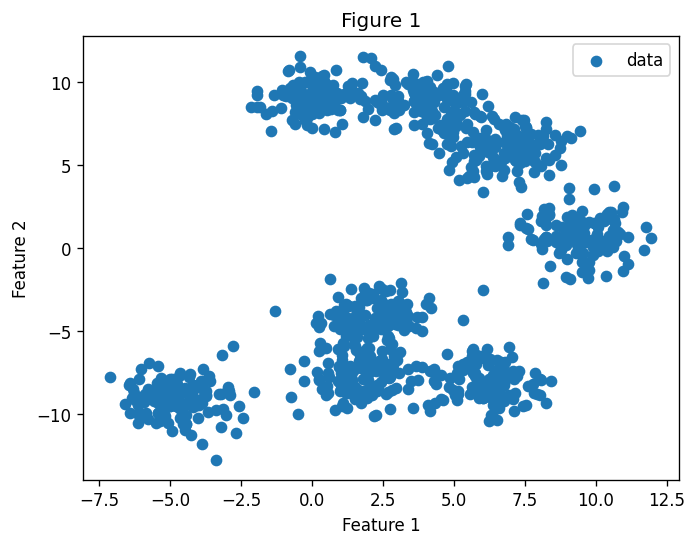

In [2]:
# make 8 blobs in 2D space
n_features = 2
centers = 8

X, y = make_blobs(n_samples=1000, centers=centers, n_features=n_features, random_state=68) #rand = 8, 42

df = pd.DataFrame(X, columns=[*[f'feature_{i}' for i in range(n_features)]])

# plot data
plt.figure(dpi=120)
x1 = df['feature_0']
x2 = df['feature_1']
plt.scatter(x1, x2, label="data")

plt.legend()
plt.title("Figure 1")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

### Preprocessing the data

Standardise the data to get all predictive variables onto similar numerical scales.

In [3]:
# create scaler object
scaler = StandardScaler()

# scale the data
X_scaled = scaler.fit_transform(df)

### Implement Gaussian mixture model clustering algorithm

In [4]:
from sklearn.mixture import GaussianMixture

In [5]:
# pick K
K = 8

In [6]:
# Create the GMM instance
GMM = GaussianMixture(n_components=K, random_state=23)

# Use the object to fit the algorithm
GMM.fit(X_scaled)

# Predict in which cluster each data point falls
GMM_pred = GMM.predict(X_scaled)

In [7]:
df['cluster_label'] = GMM_pred

Text(0, 0.5, 'Feature 2')

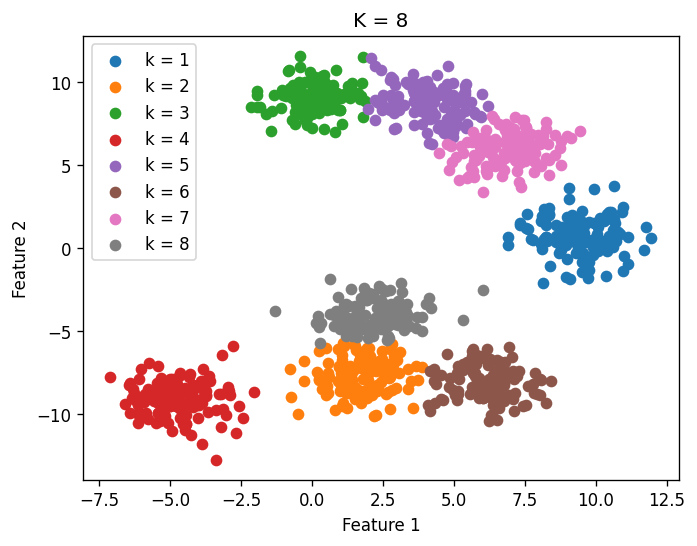

In [8]:
# plot data
plt.figure(dpi=120)
for k in range(K):
    x1 = df[df['cluster_label'] == k]['feature_0']
    x2 = df[df['cluster_label'] == k]['feature_1']
    plt.scatter(x1, x2, label="k = "+str(k+1))
    
plt.legend()
plt.title("K = 8")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

## Additional links
- [EM Algorithm - how it works](https://www.youtube.com/watch?v=REypj2sy_5U)